In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tables
import h5py
from scipy.spatial.distance import pdist, squareform
import os

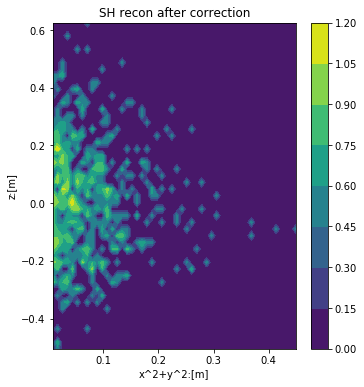

In [6]:
h = tables.open_file('../result/5kt_+0.00.h5','r')
recondata = h.root.Recon
E = recondata[:]['E_sph']
taud = recondata[:]['tau_d']
x = recondata[:]['x_sph']
xt = recondata[:]['x_truth']
y = recondata[:]['y_sph']
yt = recondata[:]['y_truth']
z = recondata[:]['z_sph']
zt = recondata[:]['z_truth']
xl = recondata[:]['x']
h.close()
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
r1 = x**2 + y**2
H1, xedges, yedges = np.histogram2d(np.nan_to_num(r1), np.nan_to_num(z), bins=50)
X, Y = np.meshgrid(xedges[1:],yedges[1:])
plt.contourf(X,Y,np.log(np.log(np.transpose(H1)+1)+1))
plt.xlabel('x^2+y^2:[m]')
plt.ylabel('z:[m]')
plt.colorbar()
#plt.plot(xt[0]**2/1e6,zt[0]/1e3,marker='o',color = 'r')
plt.title('SH recon after correction')
plt.show()